# Finding and tapping the beat in a cyclic stimulus: beat synchronization to a repeating rhythm and the speech-to-song illusion

**Authors:   Vani Rajendran**

This demo shows how to apply _REPP_ to a beat-finding tapping experiment in response to a REPEATING (or approximately repeating) stimulus. We include two examples: (a) tapping to non-isochronous repeating rhythm<sup>1</sup> and (b) beat synchronization to a repeating sound clip like the speech-to-song illusion<sup>2</sup>. Both examples load .wav files from the input dir, but see the sms_tapping.ipynb demo for an example of generating stimuli on the fly.

<sup>1</sup> Audio adapted from: Rajendran, V. G., Harper, N. S., Garcia-Lazaro, J. A., Lesica, N. A., & Schnupp, J. W. (2017). Midbrain adaptation may set the stage for the perception of musical beat. Proceedings of the Royal Society B: Biological Sciences, 284(1866), 20171455.

<sup>2</sup> Audio adapted from: https://deutsch.ucsd.edu/psychology/pages.php?i=212

In [1]:
# Before starting, set the right working dir and imports
import os
if 'path_to_dir' not in globals():
    path_to_dir = os.path.split(os.getcwd())[0]
os.chdir(path_to_dir)

# working directories for input and output files
input_dir = "input"
output_dir = "output"

import matplotlib
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import platform
if platform.system() == "Linux":
    pass
else:
    matplotlib.use('agg')
%matplotlib inline

# Import global parameters defined in config.py
from repp.config import sms_tapping, ConfigUpdater



## Choose the tapping task
Choose one of the two tapping tasks:

    1. Beat synchronization to a repeating rhythm: IS_SPEECH = False
    2. Beat synchronization to repeating speech: IS_SPEECH = True

In [2]:
IS_SPEECH = False

## 0: Add / modify config parameters
Depending on the task, you will need to update some params.

You need to provide a stimulus.wav and stimulus.txt file. The .txt file should contain virtual "onsets" that define your stimulus, which may be "played" or not. See the example .txt files to understand how to define the onsets a repeating rhythmic pattern or something less defined like speech.

Depending on your task, you may want adjust MIN_RAW_TAPS and MAX_RAW_TAPS. N_CYCLES should be set to how many times a cycle repeats in each trial. ID_OF_CYCLE_START corresponds to the index in (your stimulus.txt file) that corresponds the start of a cycle. CYCLE_DUR_S is the duration of one cycle in seconds. Set PLOT_TYPE depending on whether you want to see tapping aligned to either an ONSETS, WAFEFORM, or SPECTROGRAM representation of your stimulus. Finally, if CYCLE_TYPE is set to OBJECTIVE, a circular histogram is generated based on CYCLE_DUR_S. If CYCLE_TYPE is SUBJECTIVE, the circular histogram is generated based on the subject's own inter-tap intervals, with 0 corresponding to CYCLE_START_S.

In [3]:
if IS_SPEECH:
    config = ConfigUpdater.create_config(
        sms_tapping,
        {
            "LABEL": "beat_finding_speech",
            "PLOTS_TO_DISPLAY": [3, 4],
            'MIN_RAW_TAPS': 8,
            'MAX_RAW_TAPS': 30,
            'N_CYCLES': 4,
            'ID_OF_CYCLE_START': 0,
            'N_ONSETS_PER_CYCLE': 1,
            'PLOT_TYPE': 'WAVEFORM',
            'SCALEFAC_SPECTROGRAM': 0.001,
            'CYCLE_START_S': 0,
            'CYCLE_DUR_S': 2.965,
            'CYCLE_TYPE': 'OBJECTIVE',
        },
    )

else:

    config = ConfigUpdater.create_config(
    sms_tapping,
    {
        "LABEL": "beat_finding_rhythm",
        "PLOTS_TO_DISPLAY": [3, 4],
        'MIN_RAW_TAPS': 8,
        'MAX_RAW_TAPS': 30,
        'N_CYCLES': 4,
        'ID_OF_CYCLE_START': 0,
        'N_ONSETS_PER_CYCLE': 16,
        'PLOT_TYPE': 'SPECTROGRAM',
        'SCALEFAC_SPECTROGRAM': 0.1,
        'CYCLE_START_S': 0,
        'CYCLE_DUR_S': 3.2,
        'CYCLE_TYPE': 'SUBJECTIVE',
    },
)

## 1: Stimulus preparation
We can now start with the first step: preparing the audio stimulus to be used with _REPP_

stim_onsets = 
[0.0, 200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3400.0, 3600.0, 3800.0, 4000.0, 4200.0, 4400.0, 4600.0, 4800.0, 5000.0, 5200.0, 5400.0, 5600.0, 5800.0, 6000.0, 6200.0, 6400.0, 6600.0, 6800.0, 7000.0, 7200.0, 7400.0, 7600.0, 7800.0, 8000.0, 8200.0, 8400.0, 8600.0, 8800.0, 9000.0, 9200.0, 9400.0, 9600.0, 9800.0, 10000.0, 10200.0, 10400.0, 10600.0, 10800.0, 11000.0, 11200.0, 11400.0, 11600.0, 11800.0, 12000.0, 12200.0, 12400.0, 12600.0]
onset_is_played = 
[ True  True  True  True  True False False  True  True False  True False
  True False False False  True  True  True  True  True False False  True
  True False  True False  True False False False  True  True  True  True
  True False False  True  True False  True False  True False False False
  True  True  True  True  True False False  True  True False  True False
  True False False False]
markers_onsets=
[ 2000.  2280.  2510. 18800. 19080. 193

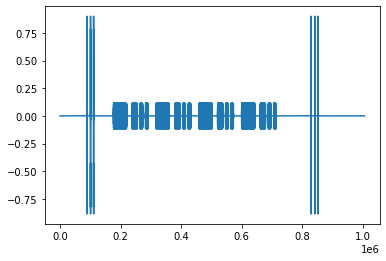

In [4]:
from repp.stimulus import REPPStimulus

if IS_SPEECH:
    stimulus = REPPStimulus("stim_speech1", config = config)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_files(input_dir)

else:
    stimulus = REPPStimulus("stim_rhythm_P2", config = config)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_files(input_dir)

plt.plot(stim_prepared)

# save stimulus info
REPPStimulus.to_json(
    stim_info,
    os.path.join(output_dir,filenames['stim_info_file'])
)

# save audio stimulus
REPPStimulus.to_wav(
    stim_prepared,
    os.path.join(output_dir,filenames['audio_filename']),
    stimulus.config.FS
)
print(filenames)

## 2: Recording phase
**Instructions:**

    - Only use the laptop speakers (unplug headphones or wireless devices)
    - Turn on your volume
    - Tap on the surface of your laptop with your index finger (do not tap on any key or trackpad)

In [5]:
import sounddevice as sd

print("****RECORDING PHASE: Please tap how you hear the beat in this stimulus")

myrecording = sd.playrec(stim_prepared, stimulus.config.FS, channels=1)
sd.wait()  # Wait until recording is finished

# save recording to wav
REPPStimulus.to_wav(
    myrecording,
    os.path.join(output_dir,filenames['recording_filename']),
    stimulus.config.FS
)

****RECORDING PHASE: Please tap how you hear the beat in this stimulus


## 3: Signal processing and performance analysis

Extracting audio signals from mono recording...
reading audio file:
fs=44100 len(samples)=1005480
Extracting raw onsets from  audio signals...
Aligning tapping onsets with marker onsets...
response-stimulus asynchronies = 
Plot saved


(-0.5, 7499.5, 3149.5, -0.5)

<Figure size 432x288 with 0 Axes>

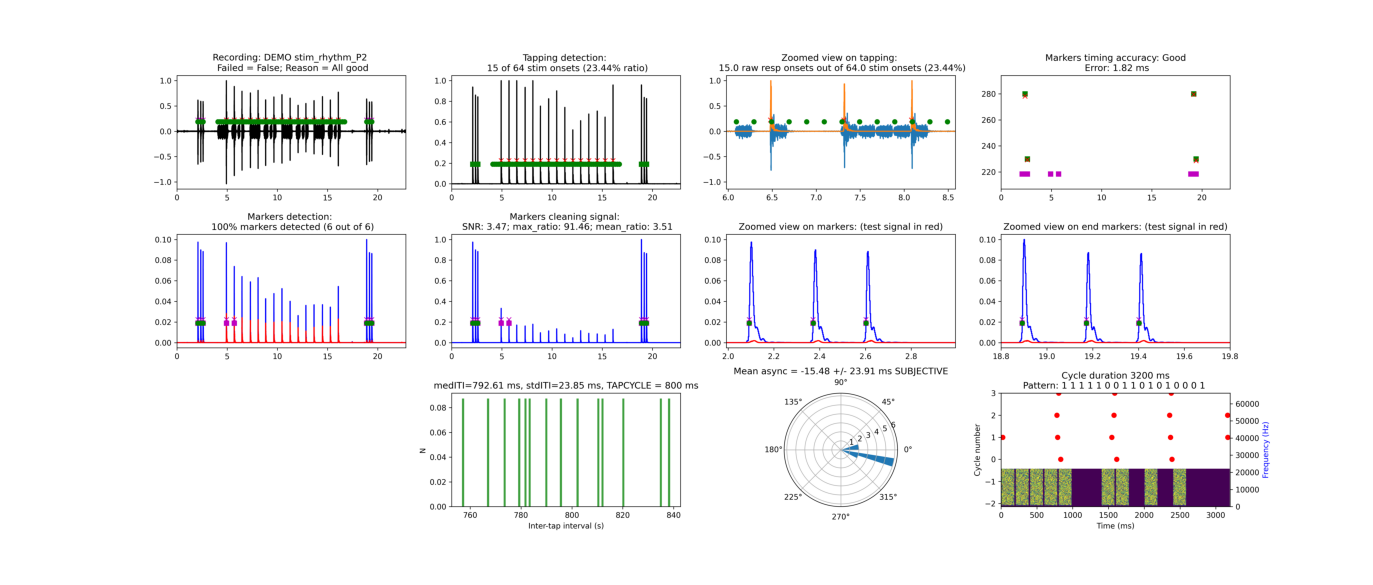

In [6]:
from reppextension.beat_detection import REPPAnalysisBeatDetection

analysis = REPPAnalysisBeatDetection(config = config)

# REPPExtension analysis
_, _, _ = analysis.do_beat_detection_analysis(
    os.path.join(output_dir,filenames['recording_filename']),
    os.path.join(output_dir,filenames['audio_filename']),
    stim_info,
    filenames['title_plot'],
    os.path.join(output_dir, filenames['plot_filename'])
)

# and show the plot here
img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename'])) #os.path.join(output_dir, filenames['plot_filename']))
imgplot = plt.imshow(img)
plt.axis('off')
